In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_excel("RestaurantData_Train.xlsx")
df_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [3]:
df_test=pd.read_excel("RestaurantData_Test.xlsx")
df_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [4]:
df_train["DATA"] = "train"
df_test["DATA"] = "test"
df_test["COST"]=0

In [5]:
res=pd.concat([df_train,df_test])
res.head(10)

,CITY,COST,CUISINES,DATA,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
0,Thane,1200,"Malwani, Goan, North Indian",train,Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49 votes
1,Chennai,1500,"Asian, Modern Indian, Japanese",train,Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30 votes
2,Chennai,800,"North Indian, Chinese, Biryani, Hyderabadi",train,Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221 votes
3,Mumbai,800,"Tibetan, Chinese",train,Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24 votes
4,Mumbai,300,Desserts,train,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165 votes
5,Mumbai,800,"North Indian, Chinese, Seafood, Biryani",train,Vile Parle West,4.0,5618,12noon – 12:30AM (Mon-Sun),CASUAL DINING,550 votes
6,Bangalore,600,"Cafe, Chinese, Pizza, North Indian, Burger",train,Koramangala 6th Block,4.1,4383,"12noon – 11:30pm (Mon, Tue, Thu, Fri, Sat, Sun...",CAFÉ,509 votes
7,Gurgaon,1600,Bar Food,train,Sector 29,4.3,1249,1pm – 1am (Mon-Sun),MICROBREWERY,1612 votes
8,Bangalore,300,"South Indian, North Indian",train,Bannerghatta Road,3.9,7062,7am – 10:30pm (Mon-Sun),QUICK BITES,101 votes
9,Hyderabad,200,North Indian,train,Dilsukhnagar,3.3,10109,"11am – 2pm, 4pm – 10:30pm (Mon-Sun)",QUICK BITES,219 votes


In [6]:
res.shape

(16921, 10)

In [7]:
res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 10 columns):
CITY             16774 non-null object
COST             16921 non-null int64
CUISINES         16921 non-null object
DATA             16921 non-null object
LOCALITY         16793 non-null object
RATING           16917 non-null object
RESTAURANT_ID    16921 non-null int64
TIME             16921 non-null object
TITLE            16921 non-null object
VOTES            15315 non-null object
dtypes: int64(2), object(8)
memory usage: 1.4+ MB


In [8]:
res.isna().sum()

CITY              147
COST                0
CUISINES            0
DATA                0
LOCALITY          128
RATING              4
RESTAURANT_ID       0
TIME                0
TITLE               0
VOTES            1606
dtype: int64

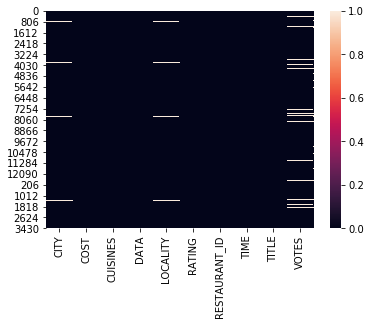

In [9]:
sns.heatmap(res.isna())

In [10]:
res['CITY'].value_counts()

Chennai                           2855
Bangalore                         2835
Hyderabad                         2458
Mumbai                            2311
New Delhi                         1754
                                  ... 
NEW BEL ROAD 560054                  1
Near Santosh Banjara Hyderabad       1
Girgaum                              1
Chennai Thousand Lights              1
Sholinganallur. Chennai              1
Name: CITY, Length: 450, dtype: int64

In [11]:
res['CUISINES'].unique()

array(['Malwani, Goan, North Indian', 'Asian, Modern Indian, Japanese',
       'North Indian, Chinese, Biryani, Hyderabadi', ...,
       'European, Mediterranean, Italian, Sushi',
       'North Indian, Chinese, Kebab, Juices', 'Sindhi, Street Food'],
      dtype=object)

In [12]:
res['CUISINES'].value_counts()

North Indian                                                716
North Indian, Chinese                                       714
South Indian                                                706
Fast Food                                                   364
Chinese                                                     226
                                                           ... 
Cafe, North Indian, Biryani                                   1
Continental, Desserts, Italian, North Indian, BBQ, Asian      1
Street Food, Mithai, Juices                                   1
European, Healthy Food, Indian                                1
South Indian, Kerala, Italian                                 1
Name: CUISINES, Length: 5183, dtype: int64

In [13]:
res['CUISINES1']=res['CUISINES'].str.split(',').str[0]
res['CUISINES2']=res['CUISINES'].str.split(',').str[1]
res['CUISINES3']=res['CUISINES'].str.split(',').str[2]
res['CUISINES4']=res['CUISINES'].str.split(',').str[3]
res['CUISINES5']=res['CUISINES'].str.split(',').str[4]

In [14]:
res['LOCALITY'].value_counts()

Gachibowli                               216
Indiranagar                              187
Kakkanad                                 175
Kukatpally                               171
Madhapur                                 169
                                        ... 
Near Pravasi Industrial Goregaon East      1
Aditya Heights                             1
Near Safdarjung                            1
Chunabhatti East                           1
NWA Club Road Punjabi Bagh                 1
Name: LOCALITY, Length: 1636, dtype: int64

In [15]:
res['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', nan, '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [16]:
res["RATING"].replace('NEW',1.5,inplace=True)
res["RATING"].replace('-',2.5,inplace=True)

In [17]:
res['RATING']=res['RATING'].astype(float)

In [18]:
res['TITLE'].unique()

array(['CASUAL DINING', 'CASUAL DINING,BAR', 'QUICK BITES',
       'DESSERT PARLOR', 'CAFÉ', 'MICROBREWERY',
       'QUICK BITES,BEVERAGE SHOP', 'CASUAL DINING,IRANI CAFE',
       'BAKERY,QUICK BITES', 'None', 'BAR,CASUAL DINING', 'BAR', 'PUB',
       'BEVERAGE SHOP', 'FINE DINING', 'CAFÉ,QUICK BITES',
       'BEVERAGE SHOP,DESSERT PARLOR', 'SWEET SHOP,QUICK BITES',
       'DESSERT PARLOR,SWEET SHOP', 'BAKERY', 'BAKERY,DESSERT PARLOR',
       'BAR,LOUNGE', 'FOOD COURT', 'LOUNGE',
       'DESSERT PARLOR,BEVERAGE SHOP', 'LOUNGE,CASUAL DINING',
       'FOOD TRUCK', 'QUICK BITES,FOOD COURT', 'SWEET SHOP',
       'BEVERAGE SHOP,FOOD COURT', 'PUB,CASUAL DINING', 'MESS',
       'MICROBREWERY,CASUAL DINING', 'CASUAL DINING,SWEET SHOP', 'KIOSK',
       'QUICK BITES,KIOSK', 'CLUB', 'FINE DINING,BAR',
       'DESSERT PARLOR,QUICK BITES', 'FOOD COURT,QUICK BITES',
       'LOUNGE,CAFÉ', 'BAKERY,CONFECTIONERY', 'CASUAL DINING,CAFÉ',
       'DHABA', 'CAFÉ,DESSERT PARLOR', 'QUICK BITES,DESSERT PARLOR'

In [19]:
res['TITLE'].value_counts()

QUICK BITES          5634
CASUAL DINING        4910
None                 1287
CAFÉ                  830
DESSERT PARLOR        508
                     ... 
CLUB,MICROBREWERY       1
PUB,FINE DINING         1
CAFÉ,FOOD COURT         1
MEAT SHOP               1
BAR,CLUB                1
Name: TITLE, Length: 123, dtype: int64

In [20]:
res['TITLE1']=res['TITLE'].str.split(',').str[0]
res['TITLE2']=res['TITLE'].str.split(',').str[1]

In [21]:
res['VOTES'].unique()

array(['49 votes', '30 votes', '221 votes', ..., '2159 votes',
       '3807 votes', '1913 votes'], dtype=object)

In [22]:
res['VOTES'].value_counts()

44 votes      92
22 votes      88
6 votes       87
29 votes      83
24 votes      81
              ..
1210 votes     1
2541 votes     1
1092 votes     1
2235 votes     1
2971 votes     1
Name: VOTES, Length: 2075, dtype: int64

In [23]:
res['VOTES']=res['VOTES'].str.split(' ').str[0]

In [24]:
res['VOTES']=res['VOTES'].astype(float)

In [25]:
res['CITY'].fillna(res['CITY'].mode(),inplace=True)
res['CUISINES2'].fillna(res['CUISINES2'].mode(),inplace=True)
res['CUISINES3'].fillna(res['CUISINES3'].mode(),inplace=True)
res['CUISINES4'].fillna(res['CUISINES4'].mode(),inplace=True)
res['CUISINES5'].fillna(res['CUISINES5'].mode(),inplace=True)
res['LOCALITY'].fillna(res['LOCALITY'].mode(),inplace=True)
res["RATING"].fillna(0.5,inplace=True)
res['VOTES'].fillna(res['VOTES'].mean(),inplace=True)

In [26]:
res.drop(['TIME'],axis=1,inplace=True)
res.drop(['RESTAURANT_ID'],axis=1,inplace=True)
res.drop(['TITLE'],axis=1,inplace=True)
res.drop(['CUISINES'],axis=1,inplace=True)

In [27]:
res.head()

,CITY,COST,DATA,LOCALITY,RATING,VOTES,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,TITLE1,TITLE2
0,Thane,1200,train,Dombivali East,3.6,49.0,Malwani,Goan,North Indian,Chinese,Beverages,CASUAL DINING,NaN
1,Chennai,1500,train,Ramapuram,4.2,30.0,Asian,Modern Indian,Japanese,NaN,NaN,CASUAL DINING,BAR
2,Chennai,800,train,Saligramam,3.8,221.0,North Indian,Chinese,Biryani,Hyderabadi,NaN,CASUAL DINING,NaN
3,Mumbai,800,train,Bandra West,4.1,24.0,Tibetan,Chinese,NaN,NaN,NaN,QUICK BITES,NaN
4,Mumbai,300,train,Lower Parel,3.8,165.0,Desserts,NaN,NaN,NaN,NaN,DESSERT PARLOR,NaN


In [28]:
res.columns

Index(['CITY', 'COST', 'DATA', 'LOCALITY', 'RATING', 'VOTES', 'CUISINES1',
       'CUISINES2', 'CUISINES3', 'CUISINES4', 'CUISINES5', 'TITLE1', 'TITLE2'],
      dtype='object')

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat=['CITY','LOCALITY','CUISINES1', 'CUISINES2', 'CUISINES3', 'CUISINES4',
       'CUISINES5','TITLE1', 'TITLE2']
for val in cat:
    le=LabelEncoder()
    res[val]=le.fit_transform(res[val].astype("str"))

In [33]:
res['VOTES']=(res['VOTES']-res['VOTES'].min())/(res['VOTES'].max()-res['VOTES'].min())
res['CITY']=(res['CITY']-res['CITY'].min())/(res['CITY'].max()-res['CITY'].min())
res['COST']=(res['COST']-res['COST'].min())/(res['COST'].max()-res['COST'].min())
res['LOCALITY']=(res['LOCALITY']-res['LOCALITY'].min())/(res['LOCALITY'].max()-res['LOCALITY'].min())

In [35]:
res.head(10)

,CITY,COST,DATA,LOCALITY,RATING,VOTES,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,TITLE1,TITLE2
0,0.888889,0.085714,train,0.200489,3.6,0.001117,64,27,70,11,2,20,13
1,0.166667,0.107143,train,0.742054,4.2,0.000656,62,60,41,88,82,20,1
2,0.166667,0.057143,train,0.777506,3.8,0.005293,78,17,7,28,82,20,13
3,0.615556,0.057143,train,0.098411,4.1,0.000510,5,17,3,88,82,16,13
4,0.615556,0.021429,train,0.433374,3.8,0.003934,30,3,3,88,82,24,13
5,0.615556,0.057143,train,0.959658,4.0,0.013282,78,17,83,3,82,20,13
6,0.093333,0.042857,train,0.402812,4.1,0.012287,21,17,76,61,5,19,13
7,0.324444,0.114286,train,0.811736,4.3,0.039070,9,3,3,88,82,11,13
8,0.093333,0.021429,train,0.103301,3.9,0.002380,98,66,3,88,82,16,13
9,0.355556,0.014286,train,0.198655,3.3,0.005245,78,3,3,88,82,16,13


<function matplotlib.pyplot.show(*args, **kw)>

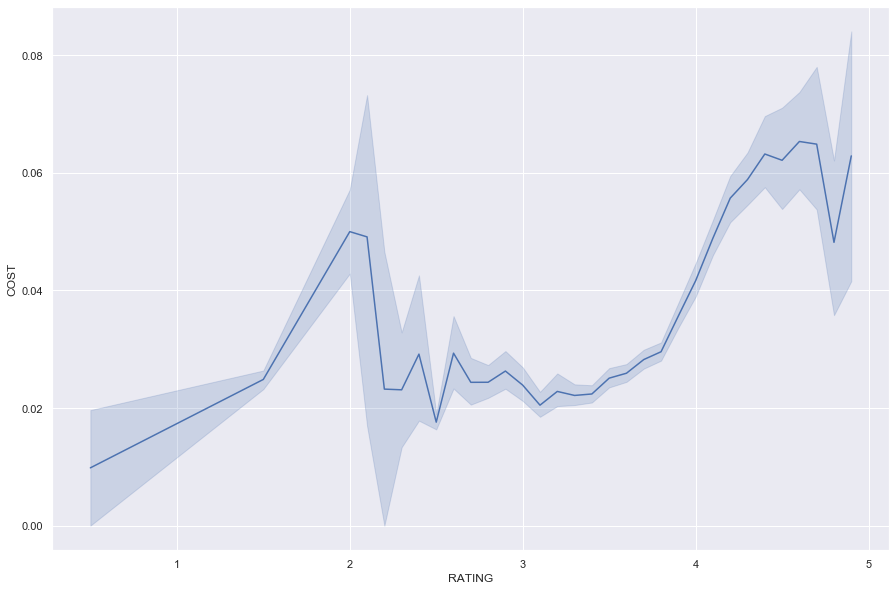

In [31]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="RATING",y="COST",data=res)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

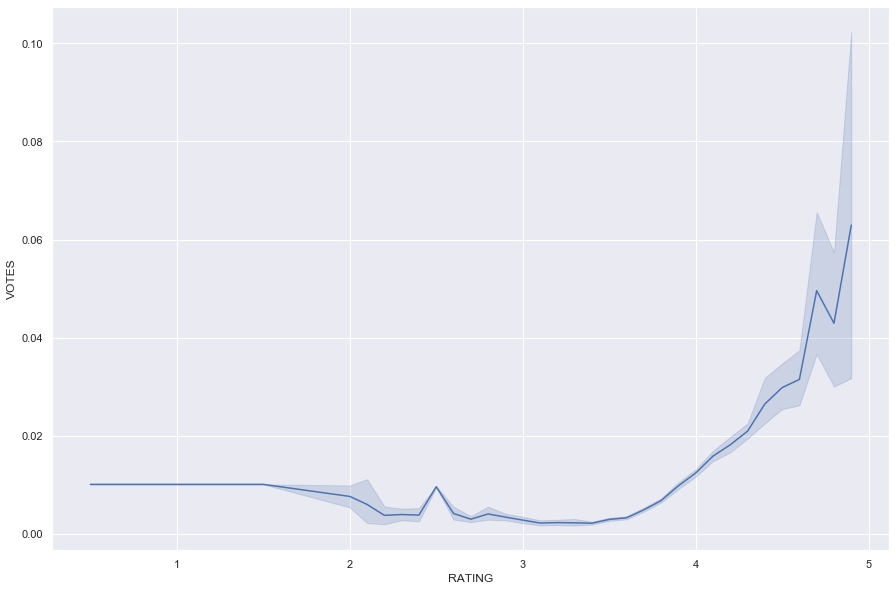

In [36]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="RATING",y="VOTES",data=res)
plt.show

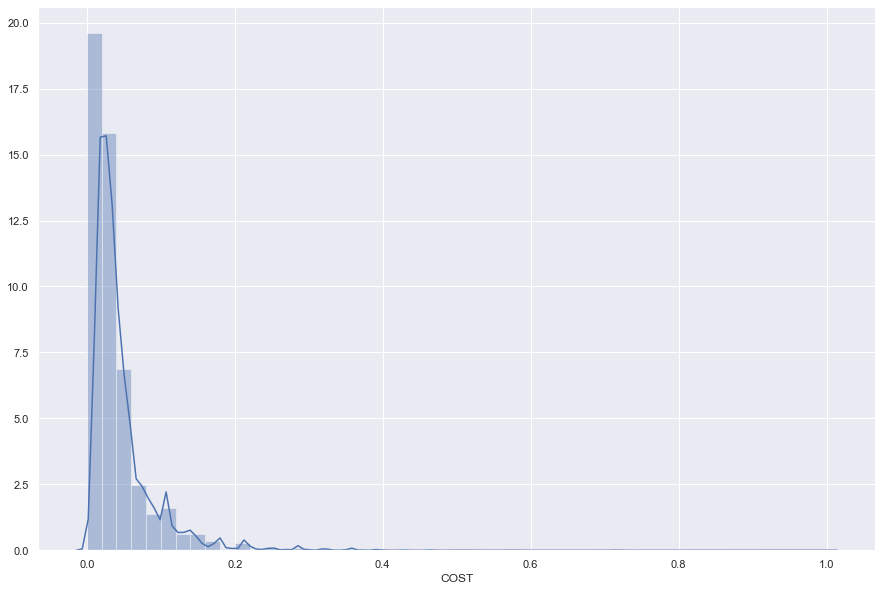

In [37]:
sns.distplot(res["COST"])

In [38]:
final_train=res.loc[res['DATA']=='train']
final_train.drop(['DATA'],axis=1,inplace=True)
final_train.head()

,CITY,COST,LOCALITY,RATING,VOTES,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,TITLE1,TITLE2
0,0.888889,0.085714,0.200489,3.6,0.001117,64,27,70,11,2,20,13
1,0.166667,0.107143,0.742054,4.2,0.000656,62,60,41,88,82,20,1
2,0.166667,0.057143,0.777506,3.8,0.005293,78,17,7,28,82,20,13
3,0.615556,0.057143,0.098411,4.1,0.000510,5,17,3,88,82,16,13
4,0.615556,0.021429,0.433374,3.8,0.003934,30,3,3,88,82,24,13


In [39]:
final_test=res.loc[res['DATA']=='test']
final_test.drop(['COST'],axis=1,inplace=True)
final_test.drop(['DATA'],axis=1,inplace=True)
final_test.head()

,CITY,LOCALITY,RATING,VOTES,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,TITLE1,TITLE2
0,0.717778,0.803178,4.3,0.013622,78,17,65,38,2,20,13
1,0.615556,0.262225,4.2,0.001408,98,22,76,61,82,16,13
2,0.615556,0.473105,3.8,0.008426,78,83,7,11,82,20,13
3,0.284444,0.517115,3.8,0.035014,13,3,3,88,82,13,13
4,0.480000,0.348411,3.6,0.000486,98,44,3,88,82,16,13


In [40]:
X=final_train.drop(['COST'],axis=1)
X.head()

,CITY,LOCALITY,RATING,VOTES,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,TITLE1,TITLE2
0,0.888889,0.200489,3.6,0.001117,64,27,70,11,2,20,13
1,0.166667,0.742054,4.2,0.000656,62,60,41,88,82,20,1
2,0.166667,0.777506,3.8,0.005293,78,17,7,28,82,20,13
3,0.615556,0.098411,4.1,0.000510,5,17,3,88,82,16,13
4,0.615556,0.433374,3.8,0.003934,30,3,3,88,82,24,13


In [41]:
y=final_train['COST']
y.head()

0    0.085714
1    0.107143
2    0.057143
3    0.057143
4    0.021429
Name: COST, dtype: float64

In [42]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=97)

In [44]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(8883, 11) (3807, 11)
(8883,) (3807,)


In [45]:
lr=LinearRegression()
la=Lasso()
en=ElasticNet()
ri=Ridge()
kn=KNeighborsRegressor()
dt=DecisionTreeRegressor(random_state=97)
ab=AdaBoostRegressor(random_state=97)
rf=RandomForestRegressor(random_state=97)
gb=GradientBoostingRegressor(random_state=97)

In [46]:
models=[]
models.append(("LinearRegression",lr))
models.append(("Lasso",la))
models.append(("ElasticNet",en))
models.append(("Ridge",ri))
models.append(("KNeighborsRegressor",kn))
models.append(("DecisionTreeRegressor",dt))
models.append(("AdaBoostRegressor",ab))
models.append(("RandomForestRegressor",rf))
models.append(("GradientBoostingRegressor",gb))

In [47]:
model=[]
R2_score=[]
cvs=[]
MSE=[]
for i,model in models:
    print("-------------------",model,"----------------------")
    print("\n")
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    r2=r2_score(y_test,pred)
    print("R2_score: ",r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pred)
    print("MSE: ",mse)
    MSE.append(mse)
    score=cross_val_score(model,X,y,cv=10,scoring='r2').mean()
    print("Cross Validation: ",score)
    cvs.append(score)
    print("\n")

------------------- LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) ----------------------


R2_score:  0.20636042112594666
MSE:  0.0017063343734144362
Cross Validation:  0.21530461143968763


------------------- Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) ----------------------


R2_score:  -1.8232330960099574e-05
MSE:  0.0021500508912223144
Cross Validation:  -0.0004793445041730626


------------------- ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False) ----------------------


R2_score:  -1.8232330960099574e-05
MSE:  0.0021500508912223144
Cross Validation:  -0.0004793445041730626


------------------- Ridge(alpha=1.0, copy_X=True

I Choose GradientBoostingRegressor as my final model because it perform very well on our dataset and also has high R2 score,
less Mean_Squared_Error and Good Cross_val_score.

R2_score:  0.6549671956487098

MSE:  0.0007418245633054734

Cross Validation:  0.7044609200084067



In [48]:
from sklearn.externals import joblib

joblib.dump(gb,'res_joblib')

['res_joblib']

In [49]:
model=joblib.load("res_joblib")
model.predict(final_test)

array([0.03197082, 0.02931786, 0.02626376, ..., 0.02883599, 0.02553196,
       0.02858606])